1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión lineal multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv('usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


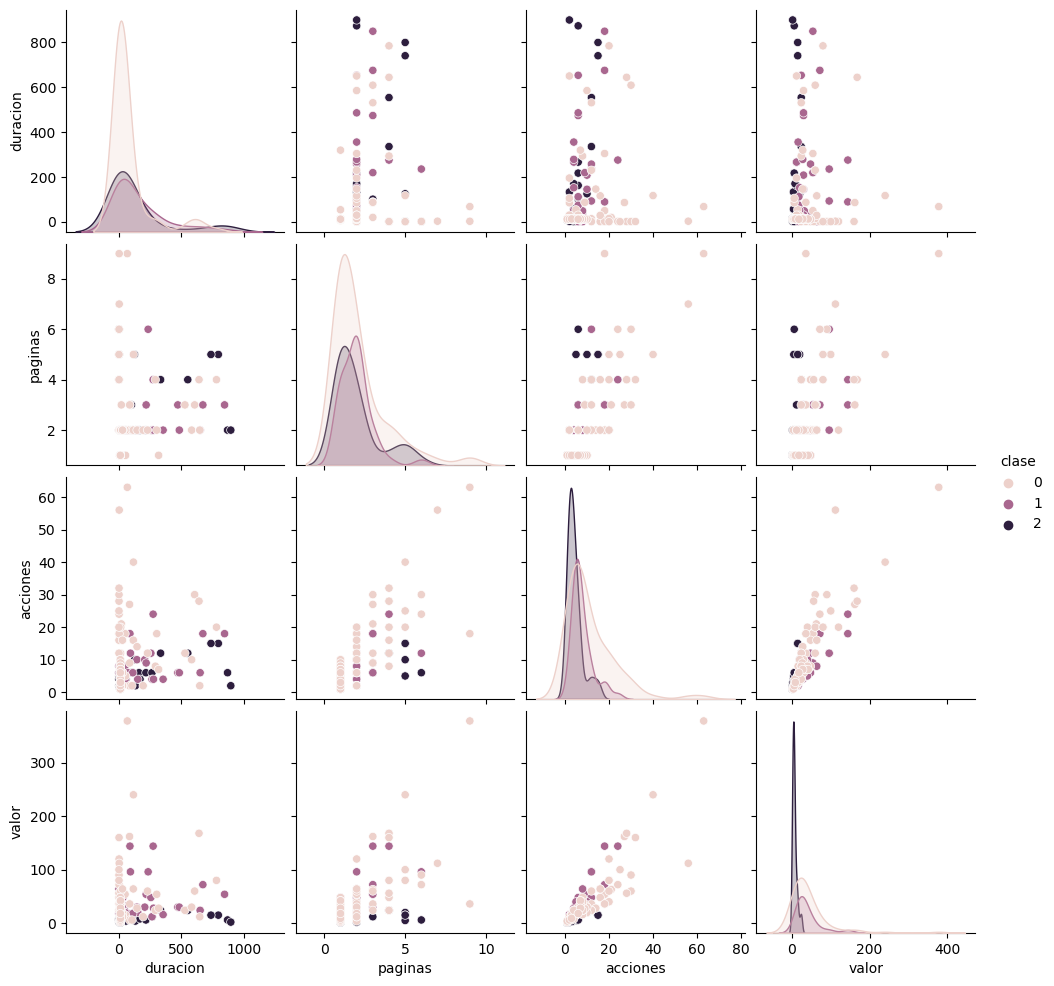

In [13]:
sns.color_palette("Paired")
sns.pairplot(df, hue="clase");

In [14]:
# Features y target
X = df.drop("duracion", 1)
y = df["duracion"]

In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [16]:
df.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coeficientes:", model.coef_)
print("Interceptor:", model.intercept_)
print("R^2:", model.score(X_train, y_train))

Coeficientes: [21.13634697 12.87425465 -2.04495721 46.67111192]
Interceptor: -16.37990315977322
R^2: 0.14813704890209378


In [18]:
prediction = model.predict(X_test)
prediction

array([ 37.61742438,  91.34160589, 130.58655995, 129.34486954,
        58.67150788,  23.30272389,  18.23520983,  37.61742438,
        53.24108984,  39.3715568 , 154.3723755 ,  58.67150788,
        92.59984602,  66.80211934,  57.68641378, 623.497578  ,
       139.95773278,  34.00054046,  85.0918031 ,  79.5941105 ,
       110.11930907, 236.79054271, 109.59706118,  77.39999367,
       266.91979121, 184.21079922, 152.94847939,  30.5151374 ,
        27.10181353, 188.55618093,  83.16177704,  54.05934556,
        18.8397212 , 130.58655995])

In [19]:
print("R^2:", model.score(X_test, y_test)) # R cuadrado negativo se interpreta como 0, es decir, los puntos no se ajustan nada bien a la recta de regresión

R^2: -0.31759452008651556


In [20]:
df['duracion'].describe()

count    170.000000
mean     111.075729
std      202.453200
min        1.000000
25%       11.000000
50%       13.000000
75%      108.000000
max      898.000000
Name: duracion, dtype: float64

In [21]:
np.sqrt(mean_squared_error(y_test, prediction))

220.65573239823073

In [22]:
corr_matrix = df.corr()

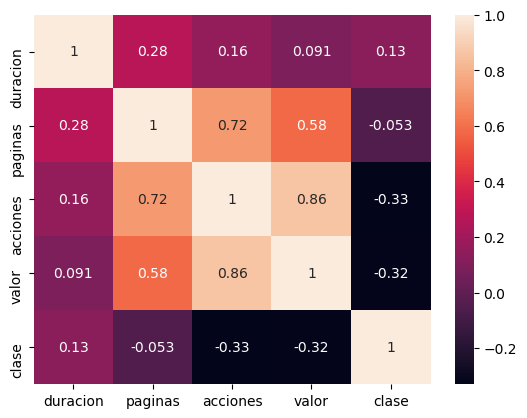

In [23]:
sns.heatmap(corr_matrix, annot=True);

In [ ]:
# coeficiente de Pearson entre -1 (relación lineal negativa) y 1 (relación lineal positiva), cerca de 0 no hay relación lineal (como aquí)